# <center>Financial Data Analysis - Classification</center>

## Libraries imported to assist in the analysis

Below are the set of libraries imported into this python notebook that is useful in doing exploratory and predictive data analysis.

In [169]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
from pandas.plotting import scatter_matrix

import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import StandardScaler 
from sklearn.neural_network import MLPClassifier,MLPRegressor
import matplotlib.pyplot as plt
import matplotlib

## Importing the data

A boxplot of imported data is constructed to understand the inner structure of the data

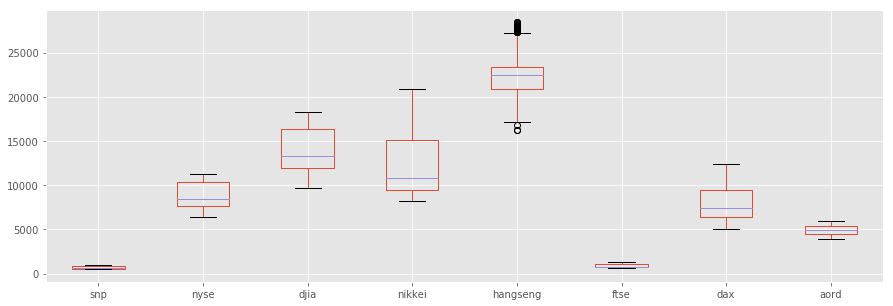

In [170]:
matplotlib.style.use('ggplot')
cd=pd.read_pickle("closing_date_dyanamic.pickle")
column_names=cd.columns.values+"_log_return"
plt.figure(figsize=(15,5))
cd.boxplot(figsize=(15,5))
plt.show()

## Log scaling the stock market indexes across the world

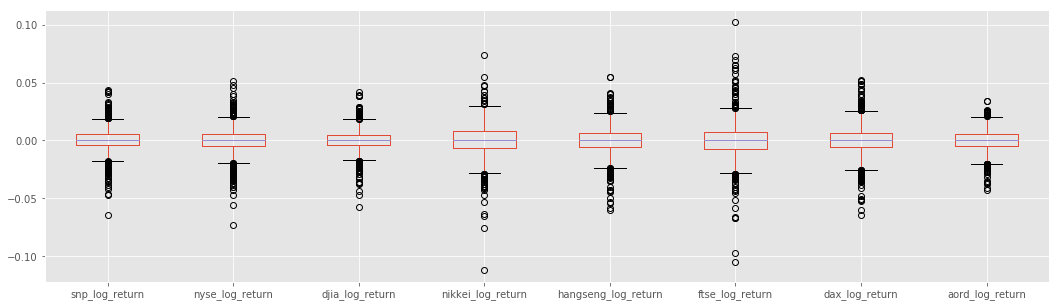

In [171]:
log_return_data = pd.DataFrame()
for i in range(0,len(column_names)):
    log_return_data[column_names[i]]=np.log(cd.iloc[:,i]/cd.iloc[:,i].shift())
    
plt.figure(figsize=(18,5))    
log_return_data.boxplot()
plt.show()
# cd

# Predictive Analysis

## 1) Adding new features to the dataset

Can also ignore the addition of these features. Neural Network model automatically determines imporatant features from the dataset. These features are added to depict this feature of Neural Network analysis

In [172]:
column_names=log_return_data.columns.values
correlated_columns=["snp","nyse","djia"]
def create_empty_training_test_dataframe():
    new_column=column_names[0]+"_positive"
    new_column_names=[]
    for i in range(0,len(column_names)):
        if "snp" in column_names[i] or "nyse" in column_names[i] or "djia" in column_names[i]:
            for k in range(1,4):
                new_column_names.append(column_names[i]+"_"+str(k))
        else:
            for k in range(0,3):
                new_column_names.append(column_names[i]+"_"+str(k))
    new_column_names.insert(0,new_column)
    training_test_data = pd.DataFrame(
      columns=new_column_names)
    return training_test_data.copy()

new_column=column_names[0]+"_positive"
log_return_data[new_column]=0
log_return_data.loc[log_return_data.iloc[:,0] >= 0, new_column] = 1
training_test_data=create_empty_training_test_dataframe()
column_names_training_test=training_test_data.columns.values
# print (column_names_training_test)

for i in range(8,len(log_return_data)):
    temp_dict={}
    temp_dict[column_names_training_test[0]] = log_return_data[new_column].iloc[i]
    for j in range(0,len(column_names)):
        if correlated_columns[0] in column_names[j] or correlated_columns[1] in column_names[j] or\
        correlated_columns[2] in column_names[j]:
            for k in range(1,4):
                temp_dict[column_names[j]+"_"+str(k)] = log_return_data[column_names[j]].iloc[i-k]
        else:
            for k in range(0,3):
                temp_dict[column_names[j]+"_"+str(k)] = log_return_data[column_names[j]].iloc[i-k]

    
    training_test_data=training_test_data.append(temp_dict,ignore_index=True)
    
training_test_data=training_test_data.dropna()
training_test_data.head()

,snp_log_return_positive,snp_log_return_1,snp_log_return_2,snp_log_return_3,nyse_log_return_1,nyse_log_return_2,nyse_log_return_3,djia_log_return_1,djia_log_return_2,djia_log_return_3,...,hangseng_log_return_2,ftse_log_return_0,ftse_log_return_1,ftse_log_return_2,dax_log_return_0,dax_log_return_1,dax_log_return_2,aord_log_return_0,aord_log_return_1,aord_log_return_2
0,1.0,0.006919,-0.008206,0.001609,0.008066,-0.010608,0.003187,0.005023,-0.003450,0.004304,...,-0.003794,0.012212,-0.006803,-0.001355,0.004307,0.003383,-0.016273,0.005962,-0.006408,-0.010007
1,0.0,0.003158,0.006919,-0.008206,0.002471,0.008066,-0.010608,0.002784,0.005023,-0.003450,...,-0.026231,-0.022504,0.012212,-0.006803,-0.019033,0.004307,0.003383,0.000020,0.005962,-0.006408
2,1.0,-0.010420,0.003158,0.006919,-0.012392,0.002471,0.008066,-0.009465,0.002784,0.005023,...,-0.001456,0.002067,-0.022504,0.012212,0.016961,-0.019033,0.004307,-0.008127,0.000020,0.005962
3,0.0,0.011572,-0.010420,0.003158,0.011742,-0.012392,0.002471,0.010854,-0.009465,0.002784,...,-0.002895,0.001376,0.002067,-0.022504,-0.021129,0.016961,-0.019033,0.001124,-0.008127,0.000020
4,0.0,-0.010389,0.011572,-0.010420,-0.015413,0.011742,-0.012392,-0.011466,0.010854,-0.009465,...,0.001099,-0.001376,0.001376,0.002067,-0.018030,-0.021129,0.016961,-0.009338,0.001124,-0.008127


## 2) Seperating data into training and testing dataset

In [173]:
predictors = training_test_data[training_test_data.columns[1:]]
classes = training_test_data[training_test_data.columns[:1]]

# 80% of the training data
training_set_size = int(len(training_test_data) * 0.8)
test_set_size = len(training_test_data) - training_set_size

training_predictors = predictors[:training_set_size]
training_classes = classes[:training_set_size]
test_predictors = predictors[training_set_size:]
test_classes = classes[training_set_size:]

plt.figure(figsize=(45,15))
training_predictors.describe()

,snp_log_return_1,snp_log_return_2,snp_log_return_3,nyse_log_return_1,nyse_log_return_2,nyse_log_return_3,djia_log_return_1,djia_log_return_2,djia_log_return_3,nikkei_log_return_0,...,hangseng_log_return_2,ftse_log_return_0,ftse_log_return_1,ftse_log_return_2,dax_log_return_0,dax_log_return_1,dax_log_return_2,aord_log_return_0,aord_log_return_1,aord_log_return_2
count,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,...,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000
mean,0.000428,0.000412,0.000418,0.000323,0.000305,0.000314,0.000385,0.000372,0.000380,0.000298,...,0.000073,0.000414,0.000399,0.000398,0.000375,0.000361,0.000350,0.000092,0.000084,0.000086
std,0.009881,0.009880,0.009879,0.010921,0.010922,0.010920,0.009345,0.009340,0.009339,0.013828,...,0.011726,0.014508,0.014507,0.014507,0.012815,0.012803,0.012812,0.009023,0.009024,0.009021
min,-0.064430,-0.064430,-0.064430,-0.073116,-0.073116,-0.073116,-0.057061,-0.057061,-0.057061,-0.111534,...,-0.058270,-0.104804,-0.104804,-0.104804,-0.064195,-0.064195,-0.064195,-0.042998,-0.042998,-0.042998
25%,-0.003936,-0.003966,-0.003936,-0.004430,-0.004465,-0.004430,-0.003868,-0.003868,-0.003855,-0.006897,...,-0.005713,-0.006947,-0.006947,-0.006947,-0.005552,-0.005552,-0.005620,-0.004583,-0.004596,-0.004596
50%,0.000852,0.000847,0.000852,0.000648,0.000645,0.000648,0.000562,0.000560,0.000562,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000698,0.000698,0.000698,0.000436,0.000431,0.000431
75%,0.005500,0.005458,0.005458,0.005926,0.005911,0.005911,0.005099,0.005079,0.005079,0.008605,...,0.006420,0.007067,0.007050,0.007050,0.006717,0.006701,0.006701,0.005203,0.005203,0.005203
max,0.043229,0.043229,0.043229,0.051173,0.051173,0.051173,0.041533,0.041533,0.041533,0.055223,...,0.055187,0.102029,0.102029,0.102029,0.052104,0.052104,0.052104,0.034368,0.034368,0.034368


## 3) Predict S&P trend using Logistic Regression

In [174]:
# Predicting the S&P trend(whether it will go up or down) using Logistic Regression

# Step 1) Create Logistic Regression object with personlized arguments
logistic = LogisticRegression()

# Step 2) Use object created above to build the Logistic Regression model and train on the dataset
model=logistic.fit(training_predictors_tf.as_matrix(),training_classes_tf.as_matrix()[:,0])

# Step 3) Predict on the test data using model created above
predicted=logistic.predict(test_predictors_tf.as_matrix())

# Step 4) Calculate the accuracy acheived
temp=predicted==test_classes_tf.as_matrix()[:,0]
accuracy=len(temp[temp==True])/len(temp)
print ("Accuracy using Logistic Regression Model = ",accuracy,"\n")

# Or you can combine Step 3 and Step 4 into one using below state
# print ("Accuracy using Logistic Regression Model = ",
#        model.score(test_predictors_tf.as_matrix(),test_classes_tf.as_matrix()[:,0]))

# Generating the classfication Report
print ("Classification Report : \n\n",
       metrics.classification_report(test_classes_tf.as_matrix()[:,0], predicted))

# Generating confusion matrix
print ("Confusion Matrix : \n",
       metrics.confusion_matrix(test_classes_tf.as_matrix()[:,0], predicted))

# Verifying model using 10 fold cross validation
scores = cross_val_score(LogisticRegression(), training_predictors_tf.as_matrix(), 
                         training_classes_tf.as_matrix()[:,0], scoring='accuracy', cv=10)
print ("\nMean accuracy validated using Cross Validation: ",scores.mean())
# write interpretation ofresult -- markdown
# convert into class - review. NO HARDCODING

Accuracy using Logistic Regression Model =  0.4965277777777778 

Classification Report : 

              precision    recall  f1-score   support

        0.0       1.00      0.01      0.01       146
        1.0       0.49      1.00      0.66       142

avg / total       0.75      0.50      0.33       288

Confusion Matrix : 
 [[  1 145]
 [  0 142]]

Mean accuracy validated using Cross Validation:  0.562110129146


## 4) Predict S&P trend using RandomForestClassifier

In [175]:
# Predicting the S&P trend(whether it will go up or down) using RandomForestClassifier

# Step 1) Create Random Forest Classifier object with personlized arguments
clf = RandomForestClassifier(n_estimators=100)

# Step 2) Use object created above to build the RandomForestClassifier model and train on the dataset
model=clf.fit(training_predictors_tf.as_matrix(), training_classes_tf.as_matrix()[:,0])

# Step 3) Predict on the test data using model created above
predicted=clf.predict(test_predictors_tf.as_matrix())

# Step 4) Calculate the accuracy acheived
temp=predicted==test_classes_tf.as_matrix()[:,0]
accuracy=len(temp[temp==True])/len(temp)
print ("Accuracy using Random Forest Classifier Model = ",accuracy,"\n")

# Or you can combine Step 3 and Step 4 into one using below state
# print ("Accuracy using Random Forest Classifier Model = ",
#        model.score(test_predictors_tf.as_matrix(),test_classes_tf.as_matrix()[:,0]))

# Generating the classfication Report
print ("Classification Report : \n\n",
       metrics.classification_report(test_classes_tf.as_matrix()[:,0], predicted))

# Generating confusion matrix
print ("Confusion Matrix : \n",
       metrics.confusion_matrix(test_classes_tf.as_matrix()[:,0], predicted))

# Verifying model using 10 fold cross validation
scores = cross_val_score(RandomForestClassifier(n_estimators=100), training_predictors_tf.as_matrix(), 
                         training_classes_tf.as_matrix()[:,0], scoring='accuracy', cv=10)
print ("\nMean accuracy validated using Cross Validation: ",scores.mean())

Accuracy using Random Forest Classifier Model =  0.6979166666666666 

Classification Report : 

              precision    recall  f1-score   support

        0.0       0.74      0.62      0.68       146
        1.0       0.67      0.77      0.72       142

avg / total       0.70      0.70      0.70       288

Confusion Matrix : 
 [[ 91  55]
 [ 32 110]]

Mean accuracy validated using Cross Validation:  0.698376601173


## 5) Predict S&P trend using Neural Network MLPClassifier

In [176]:
# Predicting the S&P trend(whether it will go up or down) using Neural Network MLPClassfier

# Step 1) Create Mulit-Layer Perceptron Classifier object with personlized arguments
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(2, ), random_state=1,activation='logistic',max_iter=200)

# Step 2) Use object created above to build the Neural Network model and train on the dataset
model=clf.fit(training_predictors_tf.as_matrix(), training_classes_tf.as_matrix()[:,0]) 

# Step 3) Predict on the test data using model created above
predicted=clf.predict(test_predictors_tf.as_matrix())

# Step 4) Calculate the accuracy acheived
temp=predicted==test_classes_tf.as_matrix()[:,0]
accuracy=len(temp[temp==True])/len(temp)
print ("Accuracy using Neural Network Classifier Model = ",accuracy,"\n")

# Or you can combine Step 3 and Step 4 into one using below state
# print ("Accuracy using Neural Network Classifier Model = ",
#        model.score(test_predictors_tf.as_matrix(),test_classes_tf.as_matrix()[:,0]))

# Generating the classfication Report
print ("Classification Report : \n\n",
       metrics.classification_report(test_classes_tf.as_matrix()[:,0], predicted))

# Generating confusion matrix
print ("Confusion Matrix : \n",
       metrics.confusion_matrix(test_classes_tf.as_matrix()[:,0], predicted))

# Verifying model using 10 fold cross validation
scores = cross_val_score(RandomForestClassifier(n_estimators=100), training_predictors_tf.as_matrix(), 
                         training_classes_tf.as_matrix()[:,0], scoring='accuracy', cv=10)
print ("\nMean accuracy validated using Cross Validation: ",scores.mean())

Accuracy using Neural Network Classifier Model =  0.7048611111111112 

Classification Report : 

              precision    recall  f1-score   support

        0.0       0.74      0.64      0.69       146
        1.0       0.67      0.77      0.72       142

avg / total       0.71      0.70      0.70       288

Confusion Matrix : 
 [[ 93  53]
 [ 32 110]]

Mean accuracy validated using Cross Validation:  0.69837607512
